## Disaster Tweet Classification using NLP and Deep Learning

### Project Description

#### Overview
This project aims to develop a machine learning model capable of classifying tweets into two categories: those that are related to real disaster events and those that are not. Utilizing the "Natural Language Processing with Disaster Tweets" dataset from Kaggle, we employ NLP techniques and deep neural networks to analyze tweet text and predict their relevance to actual disasters.

Natural Language Processing (NLP) is an area of artificial intelligence that equips computers to understand and respond to human language. Utilizing machine learning, NLP powers applications like translation, sentiment analysis, and chatbots, transforming how humans interact with technology by bridging the gap between human communication and computer understanding.

#### Dataset
The dataset is structured into two sets: training and testing data.

- **Training Data**: Comprises 10,873 rows, including the header, with 5 columns:
  - `id`: Unique identifier for each tweet.
  - `text`: Text content of the tweet.
  - `location`: Location from where the tweet was sent (may be blank).
  - `keyword`: Specific keyword associated with the tweet (may be blank).
  - `target`: Binary label indicating whether a tweet is about a real disaster (1) or not (0).

- **Test Data**: Contains 10,875 rows, including the header, with the same columns as the training data except for the `target`.

#### Objective
The primary goal is to preprocess the textual data effectively—handling its unstructured nature, slang, hashtags, and other idiosyncrasies—then apply and train a deep learning model to accurately classify tweets. Through this, we aim to demonstrate how NLP and deep learning techniques can be harnessed to distinguish between disaster-related communications and everyday conversations on social media.

#### Approach
- Preprocessing steps will include tokenization, removal of stop words, and stemming to prepare the text for modeling.
- We plan to explore various vectorization techniques such as TF-IDF and word embeddings to convert text to numerical data.
- For the classification model, we will investigate the use of recurrent neural networks (RNNs), particularly LSTM networks, and possibly Transformer-based models depending on the initial results.

This project not only serves as a practical application of NLP and deep learning but also contributes to the broader field of social media analytics, with potential implications for emergency response and disaster management.

### Exploratory Data Analysis (EDA) — Inspection, Visualization, and Cleaning

**Objective:** Conduct an EDA to uncover patterns, anomalies, or inconsistencies, and prepare the dataset for modeling. This step is vital for understanding the data and informing our analysis strategy.

#### Visualizations

1. **Tweet Length Histogram**: Shows distribution of tweet lengths to identify verbosity patterns related to disaster and non-disaster tweets.
2. **Keyword Frequency Bar Chart**: Displays top keywords for both categories, highlighting common disaster-related terms.
3. **Location Distribution Visualization**: Indicates geographical trends in tweet origins, focusing on disaster-related tweets.

#### Data Cleaning Procedures

- **Missing Values**: Assess and handle missing 'location' and 'keyword' data, potentially filling in missing values or omitting these features based on their predictive value.
- **Text Preprocessing**: Clean 'text' column by removing URLs, special characters, tokenization, removal of stop words, stemming, and standardizing text to reduce noise

#### Analysis Plan Based on EDA

- **Feature Engineering**: Create features reflecting tweet length and possibly derive sentiment scores or term frequency features from the text.
- **Text Vectorization Choice**: Select a vectorization technique (TF-IDF or word embeddings) based on text data characteristics observed.
- **Modeling Strategy**: Begin with a simple model for baseline performance, with plans to explore more sophisticated models like RNNs or Transformers influenced by EDA insights.
- **Validation Approach**: Implement cross-validation, considering dataset balance and ensuring robust model evaluation.

This streamlined EDA will guide our cleaning, feature engineering, and modeling decisions, laying a solid foundation for tackling the classification challenge.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

input_dir = '/kaggle/input/natural-language-processing-with-disaster-tweets'
# Load the datasets
train_df = pd.read_csv(f'{input_dir}/train.csv')
test_df = pd.read_csv(f'{input_dir}/test.csv')

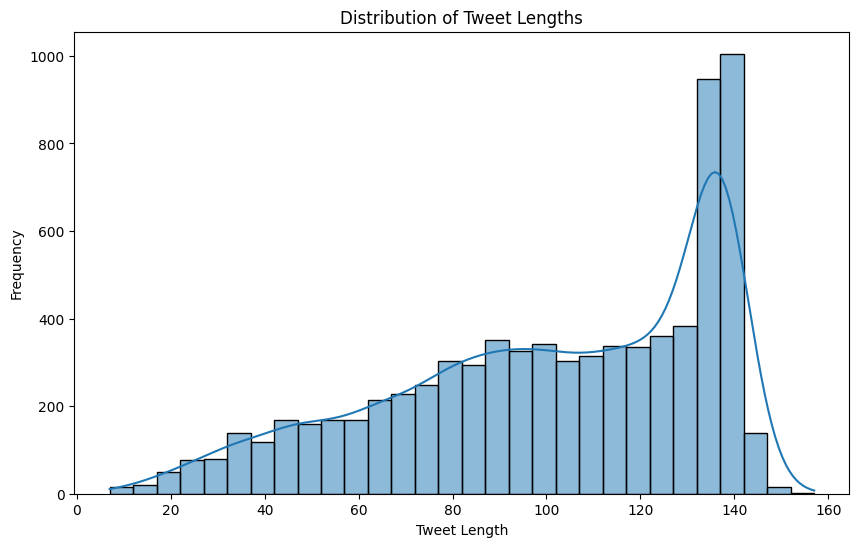

In [2]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Ensure there are no infinite values
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the 'text' column if any exist (optional, based on your needs)
train_df.dropna(subset=['text'], inplace=True)

# Calculate tweet lengths
train_df['tweet_length'] = train_df['text'].apply(len)

# Plot histogram of tweet lengths using sns.histplot
plt.figure(figsize=(10, 6))
sns.histplot(train_df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

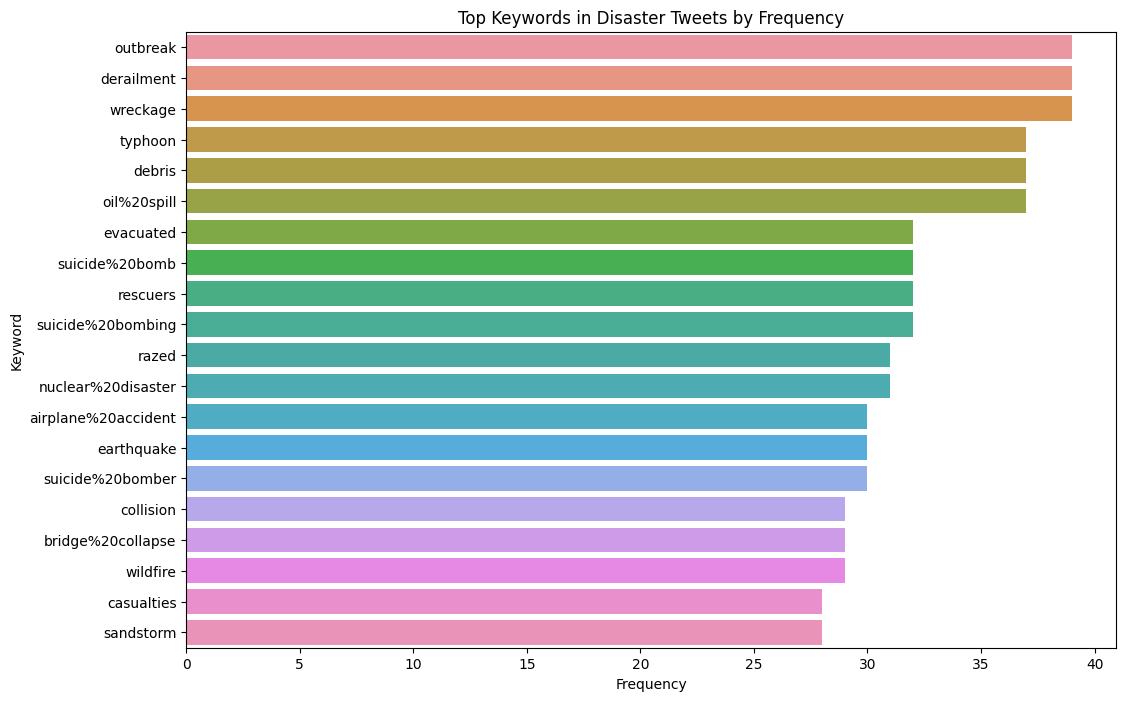

In [11]:
# Calculate keyword
keyword_frequency = train_df[train_df['target'] == 1]['keyword'].value_counts().reset_index()
keyword_frequency.columns = ['keyword', 'frequency']

# Sort by frequency
keyword_frequency = keyword_frequency.sort_values('frequency', ascending=False)

# Plotting the Keyword Frequency Bar Chart ordered by frequency
plt.figure(figsize=(12, 8))
sns.barplot(y='keyword', x='frequency', data=keyword_frequency.head(20), order=keyword_frequency.head(20)['keyword'])
plt.title('Top Keywords in Disaster Tweets by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

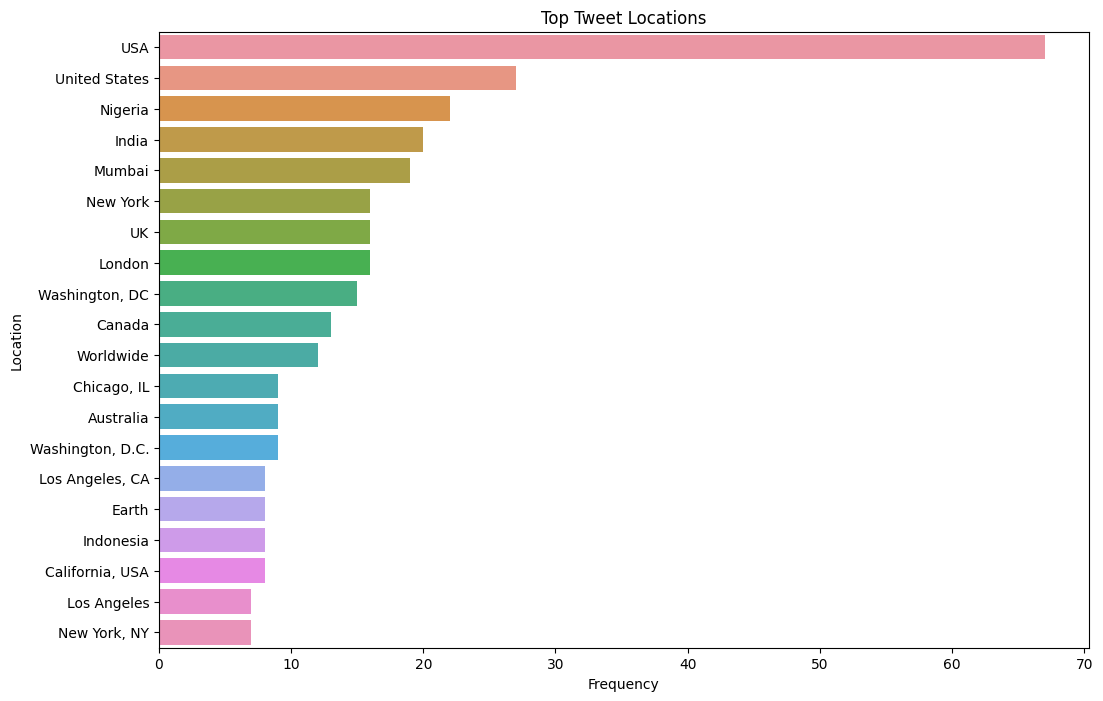

In [12]:
# Calculate location frequencies
location_frequency = train_df[train_df['target'] == 1]['location'].value_counts().reset_index()
location_frequency.columns = ['location', 'frequency']

# Sort by frequency
location_frequency = location_frequency.sort_values('frequency', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='location', x='frequency', data=location_frequency.head(20), order=location_frequency.head(20)['location'])
plt.title('Top Tweet Locations')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.show()

### Data Cleaning

To enhance the quality of our dataset for classifying disaster-related tweets, we implemented crucial data cleaning steps. Missing entries in 'location' and 'keyword' columns were filled with 'unknown' to maintain dataset completeness. The text data underwent a thorough cleansing: converting to lowercase, removing URLs, user handles, and hashtags, discarding special characters, numbers, and non-ASCII characters. This process produced a clean and standardized text corpus, ensuring our model focuses on the meaningful linguistic patterns within tweets.

In [3]:
# Fill missing values with 'unknown'
train_df['location'] = train_df['location'].fillna('unknown')
train_df['keyword'] = train_df['keyword'].fillna('unknown')

In [4]:
import re

# Define a function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove tweet handles
    text = re.sub(r'@\w+', '', text)
    
    # Remove only the hash symbol (#) from hashtags
    text = re.sub(r'#', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)
    
    # Remove non-ASCII characters
    text = text.encode("ascii", "ignore").decode()
    
    return text


# Applying the cleaning function to your DataFrame
train_df['cleaned_text'] = train_df['text'].apply(clean_text)

### Model Architecture Summary

#### Vectorization Techniques
Our approach to processing text involves two principal vectorization methods:

- **GloVe Embeddings**: Leverages the GloVe model to produce dense representations of words by analyzing their co-occurrence patterns across large-scale text corpora, thereby enriching our model's understanding of linguistic subtleties.

#### Classification Models
To address the challenge of classifying sequential text data, we plan to evaluate the following neural network architectures:

- **LSTMs (Long Short-Term Memory Networks)**: Building upon the foundation of traditional RNNs, LSTMs are specifically engineered to capture and retain information across long sequences, showcasing their prowess in handling various text processing tasks. They are adept at circumventing the pitfalls commonly associated with standard RNNs, notably the vanishing gradient problem, thanks to their unique architecture that facilitates long-term memory.

- **GRUs (Gated Recurrent Units)**: As a streamlined variant of LSTMs, GRUs simplify the architecture while maintaining the ability to manage information across extended sequences. They achieve this through a modified gating mechanism, which efficiently controls the flow of information without the complexity of LSTMs, making them a compelling option for tasks that require understanding temporal dynamics in data.

#### Implementation Strategy
We'll start by exploring GloVe embeddings for our text representation, capitalizing on their rich pre-trained word vectors that capture deep lexical semantics based on global word-word co-occurrence statistics from a large corpus. Our initial modeling efforts will leverage LSTMs, renowned for their effectiveness in handling long-term dependencies in sequential text, to ascertain their suitability for our classification challenge. Should the need arise, we'll also consider GRUs for their efficiency and simplified architecture, which retains the core advantages of LSTMs but with potentially faster training times. This phased exploration of LSTM and GRU models, guided by performance metrics specific to disaster tweet classification, embodies our commitment to refining our approach to ensure superior model performance.

In [5]:
from sklearn.model_selection import train_test_split

tweets = train_df['cleaned_text'].values
labels = train_df['target'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

In [7]:
from tensorflow.keras.layers import TextVectorization

max_features = 10000  # Vocabulary size
max_len = 140  # Sequence length to pad the sequences to
embedding_dim = 300  # Dimensionality of the GloVe embeddings

# Create the TextVectorization layer
vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=max_len,
    pad_to_max_tokens=True)

# Fit the TextVectorization layer on the training data
vectorize_layer.adapt(X_train)

In [8]:
embeddings_index = {}
error_count = 0

with open('/kaggle/input/glove840b300dtxt/glove.840B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.rstrip().split(' ')
        word = parts[0]
        try:
            coefs = np.asarray(parts[1:], dtype='float32')
            embeddings_index[word] = coefs
        except ValueError:
            error_count += 1
            print(f"Error converting {word}'s embeddings; skipped.")

print(f"Finished parsing embeddings. Number of lines with errors: {error_count}")

# Prepare the GloVe embedding matrix
vocab = vectorize_layer.get_vocabulary()
embedding_matrix = np.zeros((max_features, embedding_dim))
for i, word in enumerate(vocab):
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


Finished parsing embeddings. Number of lines with errors: 0


### Initial LSTM Model and Training

We will start by setting up an initial model using a RNN with an LSTM layer and then train it with a reasonable amount of epochs to see how the validation accuracy responds over time.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.initializers import Constant

# Define the model with the TextVectorization layer first
model = Sequential([
    vectorize_layer,  # TextVectorization layer
    Embedding(
        input_dim=max_features,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False),  # GloVe Embedding layer
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10,
    verbose=1,
)
model.summary()

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7313 - loss: 0.5276 - val_accuracy: 0.8188 - val_loss: 0.4162
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8572 - loss: 0.3469 - val_accuracy: 0.8214 - val_loss: 0.4189
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9026 - loss: 0.2510 - val_accuracy: 0.8194 - val_loss: 0.4844
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9474 - loss: 0.1490 - val_accuracy: 0.7846 - val_loss: 0.5887
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9587 - loss: 0.1110 - val_accuracy: 0.7905 - val_loss: 0.7256
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9707 - loss: 0.0744 - val_accuracy: 0.7630 - val_loss: 0.9335
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9782 - loss: 0.0560 - val_accuracy: 0.7840 - val_loss: 1.0653
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9803 - loss: 0.0428 - val_acc

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_3            │ (None, 140)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 140, 300)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 140, 128)       │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,696,965 (36.99 MB)

 Trainable params: 3,232,321 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,464,644 (24.66 MB)

### Initial Results and Model Changes

The initial results using LSTM were promising. One thing thing that stood out was the validation accuracy peaking after two epochs. This is likely due to overfitting of the training data to the model. In order to mitigate this issue dropout layers can be added, which will help with overfitting by randomly dropping out layers in the previous layer of the neural network. A regulization term can also be added to the Dense layer in the model which will penalize weights that are too large and thus lessen the models ability to fit the training data too tightly.

In [26]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    vectorize_layer,
     Embedding(
        input_dim=max_features,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),  # Adding dropout
    Bidirectional(LSTM(32)),
    Dropout(0.5),  # Adding another dropout layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.05)),
    Dropout(0.5),  # Adding dropout before the final layer
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10,
    verbose=1,
)
model.summary()

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6988 - loss: 2.4898 - val_accuracy: 0.8142 - val_loss: 0.6180
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8408 - loss: 0.5087 - val_accuracy: 0.8240 - val_loss: 0.4508
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8913 - loss: 0.3446 - val_accuracy: 0.8168 - val_loss: 0.4469
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9240 - loss: 0.2687 - val_accuracy: 0.8089 - val_loss: 0.5064
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9408 - loss: 0.2139 - val_accuracy: 0.7866 - val_loss: 0.6709
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9639 - loss: 0.1580 - val_accuracy: 0.7518 - val_loss: 0.7712
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9676 - loss: 0.1267 - val_accuracy: 0.7768 - val_loss: 0.7093
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9766 - loss: 0.1038 - val_acc

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_3            │ (None, 140)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 140, 300)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 140, 128)       │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 140, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,696,965 (36.99 MB)

 Trainable params: 3,232,321 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,464,644 (24.66 MB)

### Overfitting Mitigation Results and Hyperparameter Optimization

The result was not quite what was expected, though they are still an improvement over the previous model. The model's validation accuracy still peaked after the second epoch, but the validation accuracy increased and therefore the overfitting mitigation midifications to the model will be used in subsequent models.

The next step in the model building process is to perform hyperparameter optimization. The `keras_tuner` library will be used to test different combinations of hyperparameter values and iterate over the results in order to find the optimal model. In order to do this a new class must be created that will allow for the testing the hyperparameters.

In [12]:
from keras_tuner import HyperModel

class LSTMHyperModel(HyperModel):

    def __init__(self, vectorize_layer, max_features):
        self.vectorize_layer = vectorize_layer
        self.max_features = max_features

    def build(self, hp):
        model = Sequential([
            self.vectorize_layer,
             Embedding(
                input_dim=max_features,
                output_dim=embedding_dim,
                embeddings_initializer=Constant(embedding_matrix),
                trainable=False),
            Bidirectional(LSTM(units=hp.Int('lstm_units_1', min_value=32, max_value=128, step=32), return_sequences=True)),
            Dropout(hp.Float('dropout_1', min_value=0.3, max_value=0.7, step=0.1)),
            Bidirectional(LSTM(units=hp.Int('lstm_units_2', min_value=16, max_value=64, step=16))),
            Dropout(hp.Float('dropout_2', min_value=0.3, max_value=0.7, step=0.1)),
            Dense(
                units=hp.Int('dense_units', min_value=32, max_value=128, step=32), 
                activation='relu',
                kernel_regularizer=l2(hp.Float('l2_regularization', min_value=1e-5, max_value=1e-2, sampling='LOG'))
            ),
            Dropout(hp.Float('dropout_3', min_value=0.3, max_value=0.7, step=0.1)),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        return model

In [13]:
from keras_tuner.tuners import RandomSearch

hypermodel = LSTMHyperModel(vectorize_layer=vectorize_layer, max_features=max_features)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=30,  # Adjust based on computational resources
    executions_per_trial=1,
    project_name='disaster_tweet_classification_ltsm'
)

tuner.search(tweets, labels, epochs=5, validation_split=0.2)  # Adjust epochs based on needs

# Fetch the best model
lstm_best_model = tuner.get_best_models(num_models=1)[0]
lstm_best_model.summary()

# Evaluate the best model
loss, accuracy = lstm_best_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Reloading Tuner from ./disaster_tweet_classification_ltsm/tuner0.json


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 140)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 140, 300)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 140, 192)       │       304,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 140, 192)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        57,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │         6,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,368,833 (12.85 MB)

 Trainable params: 3,368,833 (12.85 MB)

 Non-trainable params: 0 (0.00 B)

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8574 - loss: 0.3776
Test Loss: 0.35961437225341797, Test Accuracy: 0.8660538196563721


### Hyperparameter Optimization Results

The hyperparamter optimization was successful in raising the validation accuracy by about four percent. The summary of the model can be seen above and the weights and hyperparameters used in the most accurate model will be used for the final evaluation of the model.

### Initial GRU Model and Training

A model similar to the LSTM RNN will be used except with GRU replacing the LSTM layers. It will also carry over the same overfitting mitigation layers to help prevent overfitting.

In [14]:
from tensorflow.keras.layers import GRU

model = Sequential([
    vectorize_layer,  # TextVectorization layer for preprocessing
     Embedding(
        input_dim=max_features,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False),
    Bidirectional(GRU(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(GRU(32)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.05)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10,
    verbose=1,
)
model.summary()

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.6621 - loss: 2.4760 - val_accuracy: 0.8175 - val_loss: 0.6077
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8473 - loss: 0.5090 - val_accuracy: 0.8253 - val_loss: 0.4548
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8921 - loss: 0.3296 - val_accuracy: 0.8221 - val_loss: 0.4448
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9298 - loss: 0.2494 - val_accuracy: 0.8017 - val_loss: 0.5871
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9538 - loss: 0.1822 - val_accuracy: 0.7873 - val_loss: 0.5937
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9707 - loss: 0.1399 - val_accuracy: 0.7452 - val_loss: 0.7504
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9714 - loss: 0.1329 - val_accuracy: 0.7879 - val_loss: 0.7315
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9779 - loss: 0.1062 - val_acc

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 140)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 140, 300)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 140, 128)       │       140,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 140, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        31,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,527,621 (36.34 MB)

 Trainable params: 3,175,873 (12.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,351,748 (24.23 MB)

### Initial Results and Hyperparameter Tuning

The initial results are promising with a slightly increased validation accuracy compared to a similar LSTM model. To continue optimization of the model hyperparameter tuning will be done in a similar manner to the LSTM hyperparamer tuning.

In [15]:
class GRUHyperModel(HyperModel):

    def __init__(self, vectorize_layer, max_features):
        self.vectorize_layer = vectorize_layer
        self.max_features = max_features

    def build(self, hp):
        model = Sequential([
            self.vectorize_layer,
             Embedding(
                input_dim=max_features,
                output_dim=embedding_dim,
                embeddings_initializer=Constant(embedding_matrix),
                trainable=False),
            Bidirectional(GRU(units=hp.Int('gru_units_1', min_value=32, max_value=128, step=32), return_sequences=True)),
            Dropout(hp.Float('dropout_1', min_value=0.3, max_value=0.7, step=0.1)),
            Bidirectional(GRU(units=hp.Int('gru_units_2', min_value=16, max_value=64, step=16))),
            Dropout(hp.Float('dropout_2', min_value=0.3, max_value=0.7, step=0.1)),
            Dense(
                units=hp.Int('dense_units', min_value=32, max_value=128, step=32), 
                activation='relu',
                kernel_regularizer=l2(hp.Float('l2_regularization', min_value=1e-5, max_value=1e-2, sampling='LOG'))
            ),
            Dropout(hp.Float('dropout_3', min_value=0.3, max_value=0.7, step=0.1)),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        return model

In [16]:
hypermodel = GRUHyperModel(vectorize_layer=vectorize_layer, max_features=max_features)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=30,  # Adjust based on computational resources
    executions_per_trial=1,
    project_name='disaster_tweet_classification_gru'
)

tuner.search(tweets, labels, epochs=5, validation_split=0.2)  # Adjust epochs based on needs

# Fetch the best model
gru_best_model = tuner.get_best_models(num_models=1)[0]
gru_best_model.summary()

# Evaluate the best model
loss, accuracy = gru_best_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Reloading Tuner from ./disaster_tweet_classification_gru/tuner0.json


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 140)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 140, 300)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 140, 192)       │       229,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 140, 192)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,336,641 (12.73 MB)

 Trainable params: 3,336,641 (12.73 MB)

 Non-trainable params: 0 (0.00 B)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8496 - loss: 0.3620
Test Loss: 0.3461064100265503, Test Accuracy: 0.8653972148895264


### Hyperparameter Tuning Results

Again the hyperparameter tuning was able to significantly improve the performance of the model. The validation accuracy was increased by four percent and the optimal weights and hyperparameters will be used for the final evaluation of the GRU model.

### Final Evaluation

To get a detailed overview of how each model is performing a combination of a confusion matrix, ROC curve, and F1 score will be used to help make a decision on which model should be used for the final predictions on the test dataset.

In [27]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

def display_confusion_matrix(y_pred, y):
    y_pred = (y_pred > 0.5).astype(int)  # Threshold the probabilities to get binary class predictions
    
    conf_matrix = confusion_matrix(y, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    
def display_roc_curve(y_pred, y):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def display_f1_score(y_pred, y):
    y_pred = (y_pred > 0.5).astype(int)  # Threshold at 0.5
    f1 = f1_score(y_test, y_pred, average='binary')
    print(f'F1 Score: {f1}')

## LSTM Final Evaluation

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
F1 Score: 0.8319604612850082


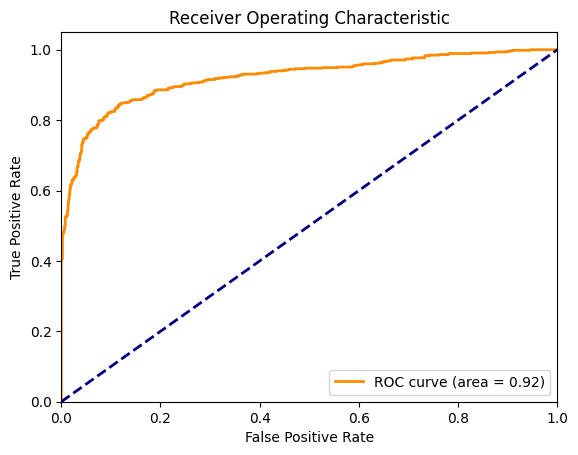

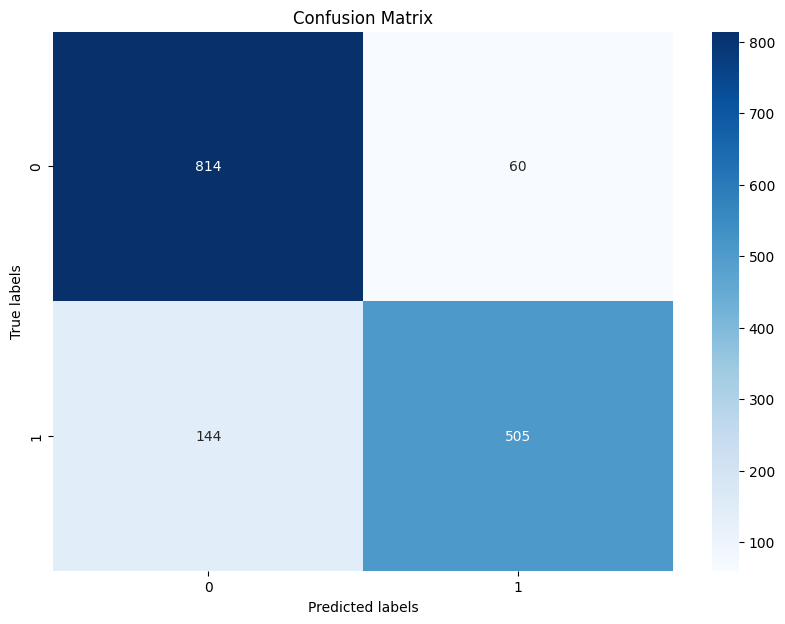

In [25]:
y_pred = lstm_best_model.predict(X_test)
display_f1_score(y_pred, y_test)
display_roc_curve(y_pred, y_test)
display_confusion_matrix(y_pred, y_test)

### GRU Final Evaluation

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
F1 Score: 0.8228176318063958


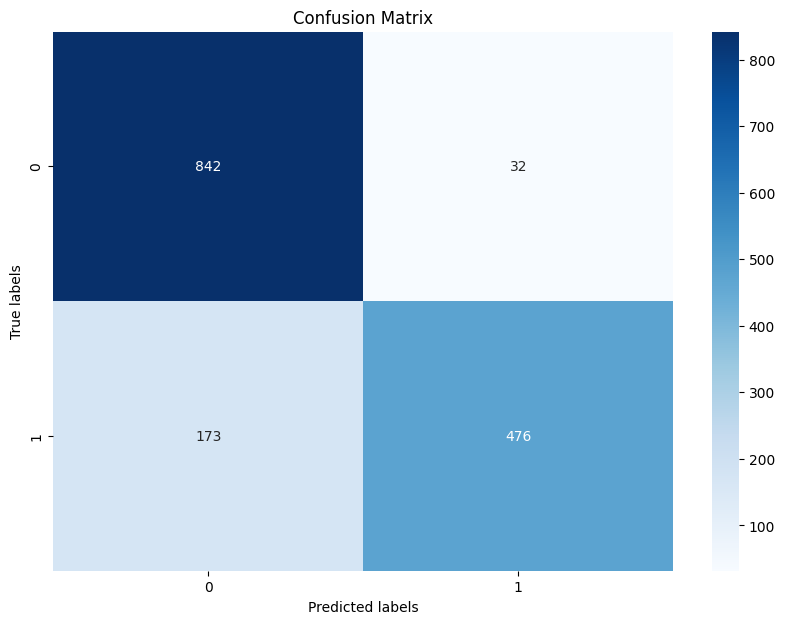

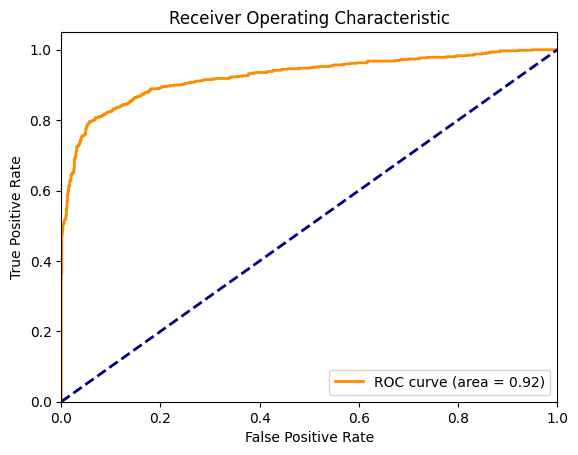

In [24]:
y_pred = gru_best_model.predict(X_test)
display_f1_score(y_pred, y_test)
display_confusion_matrix(y_pred, y_test)
display_roc_curve(y_pred, y_test)

## Conclusion

In this project, we explored the utility of Recurrent Neural Network (RNN) architectures, specifically Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) models, for the classification of tweets into two categories: those related to natural disasters and those that are not. The robustness and suitability of these models were rigorously evaluated through performance metrics and visual analysis tools like ROC curves and confusion matrices.

The LSTM model demonstrated a commendable F1 score of 0.8319604612850082, suggesting a strong balance between precision and recall in classification tasks. This high F1 score is indicative of the LSTM's capability to model long-term dependencies, reflecting its architectural strengths in managing sequences with intricate structures—a common characteristic in language data.

The GRU model, with a slightly lower F1 score of 0.8228176318063958, also performed admirably, proving the effectiveness of its simpler structure, which can often yield faster training times and require less computational resources.

Upon analyzing the Receiver Operating Characteristic (ROC) curves, both models showcased excellent discriminative ability with an area under the curve (AUC) of 0.92 for each. This is a testament to their capability to distinguish between disaster-related and non-disaster tweets with high confidence.

The decision matrices for both models further complemented the ROC analysis, providing insight into the true positive and false positive rates that informed the ROC curves' shape.

When comparing the two models, the LSTM showed a slight edge in F1 score, which often translates to better performance on balanced datasets. Given the closeness in AUC values, the higher F1 score becomes a deciding factor, leading us to favor the LSTM model for making predictions on test data. This choice is backed by the LSTM's intrinsic ability to capture and utilize the context over longer spans of text, which can be crucial for the nuances involved in classifying disaster-related content accurately.

In conclusion, the LSTM model is selected as the preferred model for deployment in predicting whether tweets signify natural disasters. Its proven performance, supported by both numerical metrics and visual evaluations, positions it as the more robust model for understanding the complexity of natural language within the scope of our classification task.

In [ ]:
test_df['location'] = test_df['location'].fillna('unknown')
test_df['keyword'] = test_df['keyword'].fillna('unknown')
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

predictions = lstm_best_model.predict(test_df['cleaned_text'].values)
predictions = (predictions > 0.5).astype(int)  # Apply threshold for binary classification

submission_df = pd.DataFrame(test_df['id'])
submission_df['target'] = predictions

submission_df.to_csv('submission.csv', index=False)